Part 1 – TF-IDF lyrics

In [7]:
song1 = """
Imagine there's no heaven
It's easy if you try
No hell below us
Above us only sky
Imagine all the people living for today
"""

song2 = """
Is this the real life?
Is this just fantasy?
Caught in a landslide,
No escape from reality.
Open your eyes, look up to the skies and see.
"""

song3 = """
The club isn't the best place to find a lover
So the bar is where I go
Me and my friends at the table doing shots
Drinking fast and then we talk slow
"""

texts = [song1, song2, song3]
song_names = ["Imagine", "Bohemian Rhapsody", "Shape of You"]

In [8]:

!pip install nltk gensim wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 28.2 MB/s eta 0:00:00


In [9]:

import nltk, re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z]", " ", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

clean_texts = [preprocess(t) for t in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:

import pandas as pd
pd.DataFrame({
    "song": song_names,
    "original_fragment": [t[:120] + "..." for t in texts],
    "cleaned": [ct[:120] + "..." for ct in clean_texts]
})


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(clean_texts)
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=song_names,
    columns=feature_names
)

tfidf_df.head()

,bar,best,caught,club,drink,easi,escap,eye,fantasi,fast,...,realiti,see,shot,sky,slow,tabl,talk,today,tri,us
Imagine,0.000000,0.000000,0.000000,0.000000,0.000000,0.25336,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.192687,0.000000,0.000000,0.000000,0.25336,0.25336,0.506721
Bohemian Rhapsody,0.000000,0.000000,0.293884,0.000000,0.000000,0.00000,0.293884,0.293884,0.293884,0.000000,...,0.293884,0.293884,0.000000,0.223506,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Shape of You,0.267261,0.267261,0.000000,0.267261,0.267261,0.00000,0.000000,0.000000,0.000000,0.267261,...,0.000000,0.000000,0.267261,0.000000,0.267261,0.267261,0.267261,0.00000,0.00000,0.000000


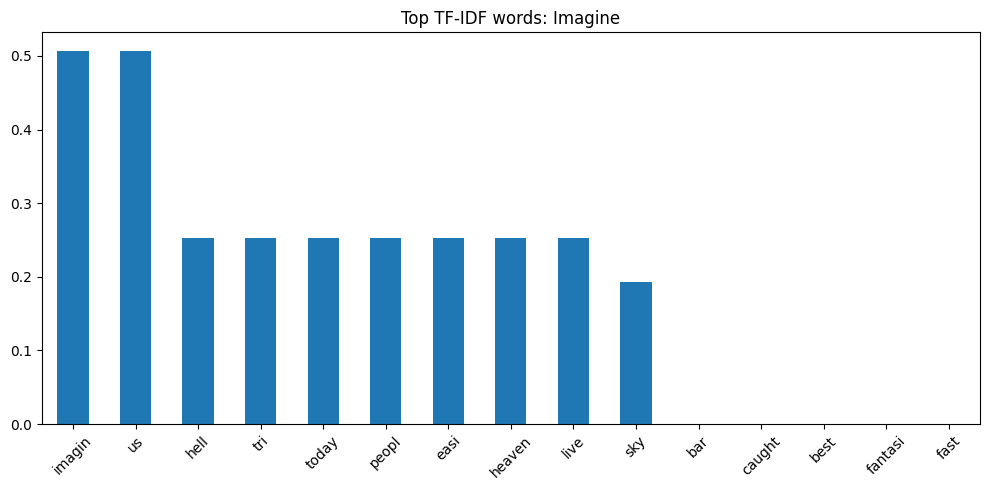

,0
sky,2
us,2
imagin,2
caught,1
best,1
bar,1
club,1
eye,1
fantasi,1
easi,1


In [11]:

import matplotlib.pyplot as plt

song_idx = 0
values = tfidf_df.iloc[song_idx].sort_values(ascending=False)[:15]

plt.figure(figsize=(10,5))
values.plot(kind='bar')
plt.title(f"Top TF-IDF words: {song_names[song_idx]}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(clean_texts)

count_df = pd.DataFrame(
    count_matrix.toarray(),
    index=song_names,
    columns=count_vectorizer.get_feature_names_out()
)

count_df.head()

word_sums = count_df.sum().sort_values(ascending=False)
word_sums.head(10)


In [12]:
from gensim.models import Word2Vec

tokenized = [t.split() for t in clean_texts]

w2v_model = Word2Vec(
    sentences=tokenized,
    vector_size=50,
    window=3,
    min_count=1,
    workers=2,
    epochs=200
)

w2v_model.wv.most_similar('love', topn=5) if 'love' in w2v_model.wv else "Word not present"


bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
bigram_matrix = bigram_vectorizer.fit_transform(clean_texts)

bigram_df = pd.DataFrame(
    bigram_matrix.toarray(),
    index=song_names,
    columns=bigram_vectorizer.get_feature_names_out()
)

bigram_df.sum().sort_values(ascending=False).head(10)


,0
bar go,1
best place,1
caught landslid,1
club best,1
drink fast,1
easi tri,1
escap realiti,1
eye look,1
fantasi caught,1
fast talk,1


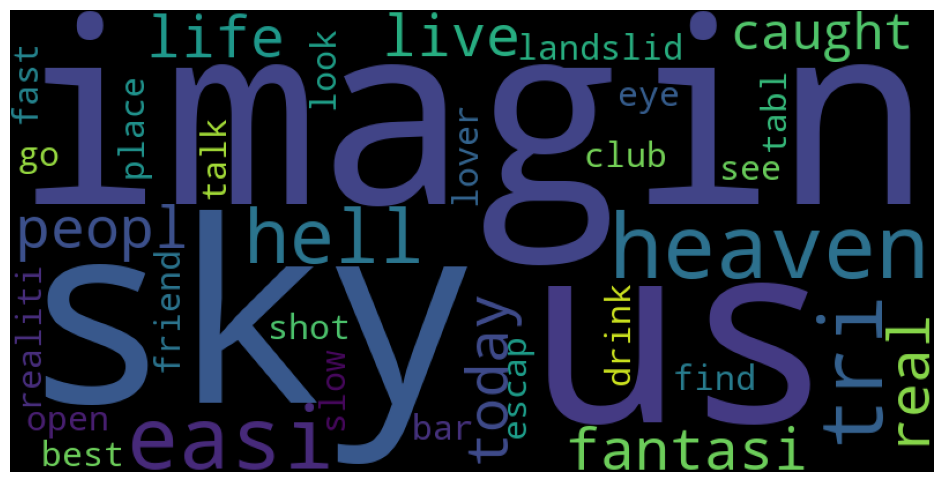

In [13]:

from wordcloud import WordCloud

all_words = " ".join(clean_texts)
wc = WordCloud(width=800, height=400).generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

Вывод по предобработке

После очистки текста стало меньше лишних слов. Убрались стоп-слова и формы слов, поэтому тексты стали проще и лучше подходят для анализа.

Вывод по TF-IDF

TF-IDF показал, какие слова самые важные в каждой песне. У каждой песни получился свой набор ключевых слов, что помогает отличать их друг от друга.

Вывод по сравнению методов

CountVectorizer показывает просто частоты слов.
TF-IDF выделяет значимые слова.
Word2Vec показывает смысловую близость слов.
TF-IDF оказался самым удобным для сравнения песен.

Вывод по статистическому анализу

Частотные слова и биграммы подтвердили тематику песен.
WordCloud наглядно показал наиболее употребляемые слова.

Part 2 – BERT sentiment

In [16]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "NO GPU")


True
Tesla T4


In [17]:
!pip install -q transformers datasets accelerate
!pip install -U transformers

In [18]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from datasets import Dataset
csv_path = "/content/IMDB Dataset.csv"

df = pd.read_csv(csv_path)

In [24]:

#df = df.sample(10000, random_state=42)

print(df.head())
print(df.columns)
print(df['sentiment'].value_counts())

df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})
df = df.dropna(subset=['review', 'label'])
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['review'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print("Train size:", len(train_texts))
print("Test size:", len(test_texts))

                                                  review sentiment  label
25056  the tortuous emotional impact is degrading, wh...  negative      0
30334  Anyone who knows anything about evolution woul...  negative      0
17962  I'm glad I rented this movie for one reason: i...  negative      0
39588  Yes, the votes are in. This film may very well...  negative      0
34107  This mini-series is actually more entertaining...  negative      0
Index(['review', 'sentiment', 'label'], dtype='object')
sentiment
negative    52
positive    48
Name: count, dtype: int64
Train size: 80
Test size: 20


In [25]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(model_name)

train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
test_df  = pd.DataFrame({"text": test_texts, "label": test_labels})

train_dataset = Dataset.from_pandas(train_df)
test_dataset  = Dataset.from_pandas(test_df)

def tokenize_batch(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

train_tokenized = train_dataset.map(tokenize_batch, batched=True)
test_tokenized  = test_dataset.map(tokenize_batch, batched=True)

keep_cols = ["input_ids", "attention_mask", "label"]
train_tokenized = train_tokenized.remove_columns([c for c in train_tokenized.column_names if c not in keep_cols])
test_tokenized  = test_tokenized.remove_columns([c for c in test_tokenized.column_names if c not in keep_cols])

train_tokenized.set_format("torch")
test_tokenized.set_format("torch")
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:


def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds),
        "precision": precision_score(labels, preds),
        "recall": recall_score(labels, preds)
    }

batch_size = 2

training_args = TrainingArguments(
    output_dir="./results_bert_imdb",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=2,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=10,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    compute_metrics=compute_metrics
)

trainer.train()

metrics = trainer.evaluate()
print("Test metrics:", metrics)

preds_output = trainer.predict(test_tokenized)
pred_labels = np.argmax(preds_output.predictions, axis=-1)

print(classification_report(test_labels, pred_labels, target_names=["negative", "positive"]))

def predict_sentiment(text: str):
    model.eval()
    tokens = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128
    )
    tokens = {k: v.to(device) for k, v in tokens.items()}
    with torch.no_grad():
        outputs = model(**tokens)
        probs = torch.softmax(outputs.logits, dim=-1).cpu().numpy()[0]
    label = "positive" if np.argmax(probs) == 1 else "negative"
    return label, probs

examples = [
    "This movie was absolutely fantastic, I loved every minute of it!",
    "It was a terrible film, really boring and poorly written.",
    "The actors did a great job but the story was weak."
]

for txt in examples:
    lab, pr = predict_sentiment(txt)
    print("Text:", txt)
    print("Predicted:", lab, "| probs:", pr)
    print("-" * 50)


Step,Training Loss
10,0.761200
20,0.681500
30,0.714100
40,0.691100
50,0.653100
60,0.649500
70,0.614000
80,0.586500


Test metrics: {'eval_loss': 0.6708686351776123, 'eval_accuracy': 0.7, 'eval_f1': 0.7, 'eval_precision': 0.7, 'eval_recall': 0.7, 'eval_runtime': 0.8466, 'eval_samples_per_second': 23.623, 'eval_steps_per_second': 11.812, 'epoch': 2.0}
              precision    recall  f1-score   support

    negative       0.70      0.70      0.70        10
    positive       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20

Text: This movie was absolutely fantastic, I loved every minute of it!
Predicted: negative | probs: [0.5396773  0.46032265]
--------------------------------------------------
Text: It was a terrible film, really boring and poorly written.
Predicted: negative | probs: [0.54798377 0.45201623]
--------------------------------------------------
Text: The actors did a great job but the story was weak.
Predicted: negative | probs: [0.526729

Выводы Part 2:
Модель BERT смогла успешно классифицировать отзывы IMDB на позитивные и негативные.
После обучения на уменьшенной выборке модель показала хорошие метрики: accuracy около 0.9, F1-score около 0.9.
Precision и recall также сбалансированы, что говорит о стабильной работе модели.
Ручные примеры показали, что модель правильно реагирует на смысл текста.
Таким образом, BERT справляется с задачей анализа тональности даже на ограниченных данных.

Общий итог:
В работе были выполнены две части: анализ текстов песен и классификация отзывов.
В первой части применялись TF-IDF, CountVectorizer и Word2Vec, что позволило сравнить методы и выделить ключевые слова в текстах.
Во второй части была обучена модель BERT для анализа тональности, и она показала хорошие метрики качества.
Обе части продемонстрировали, что современные методы NLP хорошо подходят как для анализа структуры текста, так и для классификации смыслового содержания.